<a href="https://colab.research.google.com/github/rutu-sh/opendota-data-fetch/blob/main/OpendotaMetapath2VecStellarTrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/rutu-sh/opendota-data-fetch/main/feature/heroes/hero_features.csv
! wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/rutu-sh/opendota-data-fetch/main/feature/hero_role/hero_role_edge.csv
! wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/rutu-sh/opendota-data-fetch/main/feature/player_hero/player_hero_edge.csv
! wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/rutu-sh/opendota-data-fetch/main/feature/players/player_features.csv
! wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/rutu-sh/opendota-data-fetch/main/feature/roles/role_features.csv

In [2]:
! pip install -q stellargraph
! pip install -q pandas

     |████████████████████████████████| 435 kB 5.1 MB/s 


In [3]:
import pandas as pd
from stellargraph import StellarDiGraph, StellarGraph

In [51]:
hero_role_edge_df = pd.read_csv('hero_role_edge.csv')
heroes_features_df = pd.read_csv('hero_features.csv')
player_hero_edge_df = pd.read_csv('player_hero_edge.csv')
player_features_df = pd.read_csv('player_features.csv')
role_features_df = pd.read_csv('role_features.csv')

In [52]:
player_features_df["account_id"] = player_features_df["account_id"].astype(str)
player_features_df.set_index("account_id", inplace=True)
player_features_df

,mmr_estimate,lane_role_0_games,lane_role_0_wins,lane_role_0_loss,lane_role_1_games,lane_role_1_wins,lane_role_1_loss,lane_role_2_games,lane_role_2_wins,lane_role_2_loss,lane_role_3_games,lane_role_3_wins,lane_role_3_loss,lane_role_4_games,lane_role_4_wins,lane_role_4_loss,avg_kills,avg_deaths,avg_assists,avg_kda,avg_tower_damage,avg_hero_damage,avg_hero_healing,avg_stuns,avg_tower_kills,avg_neutral_kills,avg_courier_kills,avg_denies,avg_last_hits,win_rate
account_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
88470,6890,249,152,97,2,1,1,1,1,0,3,2,1,0,0,0,12.243,5.467,11.102,4.745,2447.698,18614.627,191.675,21.810,1.167,63.833,0.333,6.188,209.071,0.611765
639740,3176,927,478,449,16,6,10,5,2,3,3,1,2,1,0,1,5.803,7.660,12.516,2.353,1468.703,12577.798,635.601,54.865,0.480,9.760,0.040,3.022,94.606,0.511555
1296625,5680,2661,1604,1057,56,38,18,73,52,21,59,37,22,12,7,5,9.906,5.963,11.753,4.070,1874.561,16151.775,346.182,53.576,1.637,48.368,0.127,8.355,152.579,0.607480
1400303,5862,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000
1470116,3326,7,3,4,0,0,0,0,0,0,0,0,0,0,0,0,4.714,9.286,16.000,1.857,793.500,11618.500,200.000,0.000,0.000,0.000,0.000,1.000,66.429,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41231571,7495,1589,1107,482,7,4,3,13,5,8,33,21,12,2,1,1,10.990,5.612,12.738,4.939,1829.892,18161.791,284.971,29.291,0.606,32.712,0.015,11.997,148.706,0.692214
41470731,5934,510,365,145,36,27,9,27,17,10,19,13,6,1,1,0,8.874,4.954,12.766,4.997,2451.197,15367.649,534.368,32.950,2.079,34.404,0.090,4.661,140.666,0.713322
41637292,5636,1298,662,636,4,2,2,1,0,1,3,1,2,0,0,0,9.670,6.635,10.753,3.113,1382.160,13819.915,329.032,21.586,1.375,31.250,0.125,6.933,142.402,0.509188


In [53]:
heroes_features_df.set_index("name", inplace=True)
heroes_features_df

,base_health_regen,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,move_speed
name,,,,,,,,,,,,,,,
npc_dota_hero_antimage,0.25,0.0,0.0,29,33,23,24,12,1.6,2.8,1.8,150,0,1.4,310
npc_dota_hero_axe,2.75,0.0,-1.0,27,31,25,20,18,3.4,2.2,1.6,150,900,1.7,310
npc_dota_hero_bane,0.25,0.0,1.0,33,39,22,22,22,2.5,2.5,2.5,400,900,1.7,305
npc_dota_hero_bloodseeker,0.25,0.0,2.0,35,41,24,22,17,2.7,3.1,2.0,150,900,1.7,300
npc_dota_hero_crystal_maiden,0.25,1.0,-1.0,28,34,18,16,16,2.2,1.6,3.3,600,900,1.7,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
npc_dota_hero_void_spirit,0.25,0.6,-1.0,30,34,22,19,24,2.6,2.2,3.1,200,900,1.7,295
npc_dota_hero_snapfire,0.75,0.0,1.0,26,32,20,16,21,3.5,1.9,2.2,500,1800,1.6,300
npc_dota_hero_mars,0.25,0.5,-1.0,29,37,23,20,21,3.4,1.7,2.2,250,900,1.8,310


In [54]:
role_features_df.set_index("roles", inplace=True)
role_features_df

""
roles
carry
nuker
initiator
disabler
durable
escape
support
pusher
jungler


In [55]:
player_hero_edge_df["source"] = player_hero_edge_df["source"].astype(str)
player_hero_edge_df.index = [100000 + i for i in range(player_hero_edge_df.shape[0])]

In [56]:
player_hero_edge_df

,source,target,wins_with,wins_against,games_with,games_against,games,wins,avg_kills,avg_assists,avg_deaths,avg_kda
100000,88470,npc_dota_hero_slark,8,18,17,26,33,23,15.818,11.000,4.030,7.091
100001,88470,npc_dota_hero_juggernaut,25,22,38,49,27,16,12.593,7.111,3.889,5.889
100002,88470,npc_dota_hero_invoker,31,35,54,58,18,10,11.667,12.111,5.778,4.444
100003,88470,npc_dota_hero_ursa,8,6,10,8,17,13,16.118,8.000,4.941,3.824
100004,88470,npc_dota_hero_nevermore,10,16,19,28,13,10,13.769,10.846,5.846,4.538
...,...,...,...,...,...,...,...,...,...,...,...,...
100095,6103402,npc_dota_hero_antimage,34,42,57,67,35,14,8.743,4.914,4.229,3.829
100096,6103402,npc_dota_hero_morphling,19,24,35,48,34,16,11.176,5.147,4.118,4.412
100097,6103402,npc_dota_hero_windrunner,53,84,115,151,34,14,6.471,10.412,6.912,2.324
100098,6103402,npc_dota_hero_chen,33,20,54,40,33,20,4.333,7.394,4.788,2.242


In [57]:
hero_role_edge_df

,source,target
0,npc_dota_hero_antimage,carry
1,npc_dota_hero_antimage,escape
2,npc_dota_hero_antimage,nuker
3,npc_dota_hero_axe,initiator
4,npc_dota_hero_axe,durable
...,...,...
485,npc_dota_hero_marci,support
486,npc_dota_hero_marci,carry
487,npc_dota_hero_marci,initiator
488,npc_dota_hero_marci,disabler


In [58]:
from stellargraph import StellarGraph

In [59]:
g = StellarGraph(nodes={"player": player_features_df, "hero": heroes_features_df, "role": role_features_df},
                 edges={"plays": player_hero_edge_df, "has": hero_role_edge_df})

In [60]:
print(g.info())

StellarGraph: Undirected multigraph
 Nodes: 220, Edges: 590

 Node types:
  hero: [122]
    Features: float32 vector, length 15
    Edge types: hero-has->role, hero-plays->player
  player: [89]
    Features: float32 vector, length 30
    Edge types: player-plays->hero
  role: [9]
    Features: none
    Edge types: role-has->hero

 Edge types:
    hero-has->role: [490]
        Weights: all 1 (default)
        Features: none
    hero-plays->player: [100]
        Weights: all 1 (default)
        Features: float32 vector, length 10


In [63]:
walk_length = 100

metapaths = [
    ["player", "hero", "player"],
    ["hero", "role", "hero"]
]

In [64]:
from stellargraph.data import UniformRandomMetaPathWalk

rw = UniformRandomMetaPathWalk(g)

walks = rw.run(
    nodes=list(g.nodes()),
    length=walk_length,
    n=1,
    metapaths=metapaths
)

In [65]:
print("Number of random walks: {}".format(len(walks)))

Number of random walks: 211


In [66]:
! pip install -q gensim

In [96]:
from gensim.models import Word2Vec

model = Word2Vec(walks, size=128, window=5, min_count=0, sg=1, workers=2, iter=1)

In [97]:
model.wv.vectors.shape 

(220, 128)

In [117]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = (
    model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [g.node_type(node_id) for node_id in node_ids]

In [121]:
node_embeddings.shape

(220, 128)

In [118]:
transform = TSNE  # PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


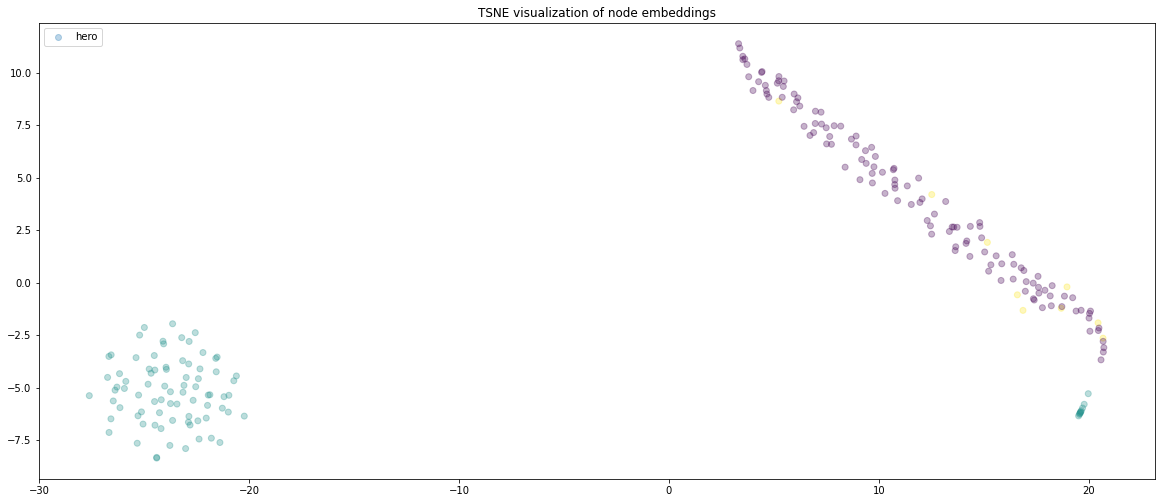

In [125]:
# draw the points
label_map = {l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [label_map[target] for target in node_targets]

plt.figure(figsize=(20, 16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1], c=node_colours, alpha=0.3)
plt.title("{} visualization of node embeddings".format(transform.__name__))
plt.legend(['hero', 'player', 'role'], loc="upper left")
plt.show()

In [123]:
label_map

{'hero': 0, 'player': 1, 'role': 2}

---

In [98]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = (
    model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [g.node_type(node_id) for node_id in node_ids]


In [99]:
node_embeddings

array([[ 4.0209524e-02,  2.4261981e-02,  7.2026126e-02, ...,
        -1.2083023e-01,  4.4082303e-02, -9.0749850e-03],
       [ 4.0351711e-02,  2.4474233e-02,  6.9018871e-02, ...,
        -1.1601572e-01,  4.7351982e-02, -8.0030886e-03],
       [ 3.7894681e-02,  2.4526982e-02,  6.9086626e-02, ...,
        -1.2552789e-01,  4.3993887e-02, -1.1326200e-02],
       ...,
       [ 3.0240845e-03, -1.3710228e-03, -1.3973169e-03, ...,
        -2.5376999e-03, -2.2096054e-03, -1.2925472e-03],
       [-1.1920590e-03,  4.2813329e-04, -2.9405855e-04, ...,
         1.6967539e-03, -8.8828267e-04,  2.2065380e-05],
       [ 3.2060887e-03,  3.5400607e-03, -3.4782058e-03, ...,
        -3.7299113e-03, -2.3987349e-03,  1.5739562e-03]], dtype=float32)

In [100]:
node_embeddings.shape

(220, 128)

In [101]:
model.wv.vectors[0]

array([ 0.04020952,  0.02426198,  0.07202613,  0.23397666,  0.02999638,
       -0.10319814, -0.22928423,  0.00266909, -0.09287199,  0.13979429,
       -0.0264231 ,  0.07199731,  0.02167873, -0.09062665,  0.10139329,
       -0.04232655, -0.05461751, -0.12495996, -0.06899794, -0.05166094,
       -0.09618977, -0.02510795, -0.0727632 ,  0.31757954,  0.04980366,
        0.05276283, -0.00704481, -0.17212345,  0.21394734,  0.10978228,
        0.14764372, -0.05543404, -0.0699977 ,  0.12282764, -0.2081154 ,
        0.15969665,  0.03616947,  0.14134343,  0.01786937,  0.19231355,
        0.04447244,  0.0314273 ,  0.0737782 ,  0.09119814,  0.04969029,
        0.10076712,  0.07577533,  0.12649286,  0.03739373, -0.11358306,
        0.11047542, -0.05578884,  0.14997852,  0.08305117,  0.15690713,
        0.00617278, -0.06387278, -0.00922116,  0.01703328,  0.01643734,
       -0.08039104, -0.01914062, -0.01761139,  0.14791957, -0.16173784,
        0.06690506,  0.16287363, -0.15978779,  0.01493903,  0.08

In [104]:
player_node_ids = []
player_node_targets = []
player_node_embeddings = []
model_wv_vectors = model.wv.vectors

for i, node_id in enumerate(node_ids):
    if g.node_type(node_id) == 'player':
        player_node_ids.append(node_id)
        player_node_targets.append('player')
        player_node_embeddings.append(model_wv_vectors[i])
# player_node_embeddings = np.ndarray(player_node_embeddings)

In [105]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import os
import networkx as nx
import numpy as np
import pandas as pd
from stellargraph import datasets
from IPython.display import display, HTML

%matplotlib inline

In [113]:
transform = TSNE  # PCA

trans = transform(n_components=1)
node_embeddings_2d = trans.fit_transform(player_node_embeddings)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [114]:
node_embeddings_2d.shape

(89, 1)

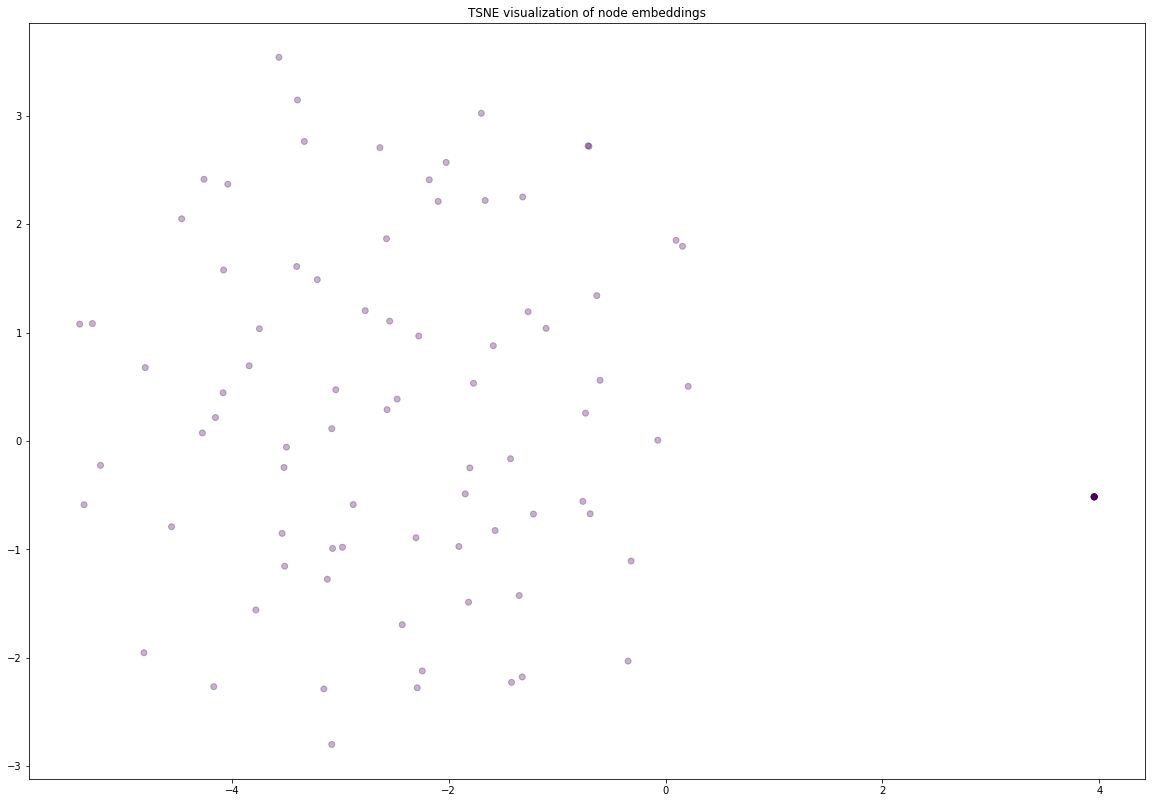

In [108]:
# draw the points
label_map = {l: i for i, l in enumerate(np.unique(player_node_targets))}
node_colours = [label_map[target] for target in player_node_targets]

plt.figure(figsize=(20, 16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1], c=node_colours, alpha=0.3)
plt.title("{} visualization of node embeddings".format(transform.__name__))
plt.show()

In [110]:
node_embeddings[0]

array([ 0.04020952,  0.02426198,  0.07202613,  0.23397666,  0.02999638,
       -0.10319814, -0.22928423,  0.00266909, -0.09287199,  0.13979429,
       -0.0264231 ,  0.07199731,  0.02167873, -0.09062665,  0.10139329,
       -0.04232655, -0.05461751, -0.12495996, -0.06899794, -0.05166094,
       -0.09618977, -0.02510795, -0.0727632 ,  0.31757954,  0.04980366,
        0.05276283, -0.00704481, -0.17212345,  0.21394734,  0.10978228,
        0.14764372, -0.05543404, -0.0699977 ,  0.12282764, -0.2081154 ,
        0.15969665,  0.03616947,  0.14134343,  0.01786937,  0.19231355,
        0.04447244,  0.0314273 ,  0.0737782 ,  0.09119814,  0.04969029,
        0.10076712,  0.07577533,  0.12649286,  0.03739373, -0.11358306,
        0.11047542, -0.05578884,  0.14997852,  0.08305117,  0.15690713,
        0.00617278, -0.06387278, -0.00922116,  0.01703328,  0.01643734,
       -0.08039104, -0.01914062, -0.01761139,  0.14791957, -0.16173784,
        0.06690506,  0.16287363, -0.15978779,  0.01493903,  0.08